<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
واترمارک
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
واترمارک حاوی متن با لوگویی است که بر روی تصاویر قرار می گیرد. این کار، یک رویه رایج در بین عکاسان، فیلمبرداران و برندها برای محافظت از محتوای خود در برابر سرقت دیگران است. در این تمرین سعی خواهیم کرد با توجه به موضوعاتی که تا به الان ارائه شد، سعی کنیم واترمارک روی یک تصویر را از بین ببریم.

نکته: از لحاظ منطقی روالی که در این مسئله طی می کنیم خیلی درست نیست چون در دنیای واقعی ما معمولا فقط تصویر واترمارک شده را در اختیار داریم و سعی میکنیم به تصویر اصلی برسیم. اما در این مسئله هم تصویر اصلی و هم تصویر واترمارک شده در اختیار ماست. هدف این تمرین صرفا کار عملی با عملیات پایه روی تصویر است که در این فصل یاد گرفتید و صرفا این مثال بهانه ای برای دست به کد شدن و انجام عملیات پایه مختلف روی تصویر است.
</font>
</p>

---

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
وارد کردن کتابخانه‌های مورد نیاز
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این بخش کتابخانه‌های مورد نیاز برای انجام تمرین را وارد می‌کنیم.
</font>
</p>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
بارگذاری تصاویر
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
لطفا تصاویر که در ابتدا در اختیار شما قرار گرفته است را بصورت رنگی بارگذاری کرده و سپس به کمک <code>matplotlib</code> آنها را رسم کنید.
</font>
</p>

In [6]:
# Load the original image
original = cv2.imread('../Data/ori.png')
# Load the watermarked image
watermarked = cv2.imread('../Data/wa.png')

# Show two loaded image in a row in one figure
cv2.imshow('original', original)
cv2.imshow('watermarked', watermarked)
cv2.waitKey(0)

-1

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
محاسبه تفاوت دو تصویر
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
برای پیدا کردن واترمارک ها کافی است تفاوت دو تصویر واترمارک شده و تصویر اصلی محاسبه شود. سپس تصویر تفاصل را رسم کنید.
</font>
</p>

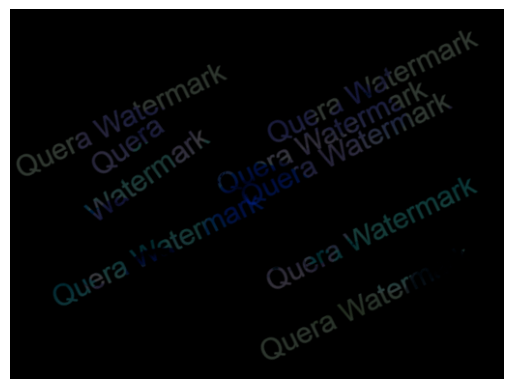

In [7]:
diff = cv2.absdiff(watermarked, original)

plt.imshow(cv2.cvtColor(diff,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حال تصویر واترمارک ها باید باینری شود برای اینکار ابتدا لازم است تصویر را به سطح خاکستری تبدیل کنیم.
</font>
</p>

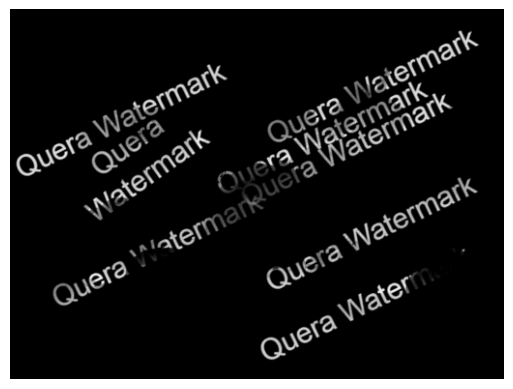

In [8]:
# تبدیل اختلاف به مقیاس خاکستری
gray_diff = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_diff,cmap='gray')
plt.axis('off')
plt.show()

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
باینری سازی تصویر
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
تصویر باینری تصویری بود که تنها از دو مقدار سیاه خالص و سفید خالص تشکیل شده بود. برای تبدیل تصویر سطح خاکستری به تصویر باینری تکنیک های متفاوتی وجود دارد. ساده ترین تکنیک عمل <code>thresholding</code> است که مثلا ما اعلام کنیم پیکسل هایی با شدت روشنایی پایین تر از 128، سیاه و بالاتر از 128 سفید شوند. اما تکنیک های پیشرفته تر مبتنی بر آمار مثل روش <code>Utso</code> نیز وجود دارند. برای این سلول هدف تبدیل تصویر سطح خاکستری بالا به باینری است. با روش ساده می توانید اعلام کنید پیکسل های زیر 10 سیاه و بالا تر از 10 سفید شوند. اگر مایل بودید در سلول بعدی میتوانید به کمک روش آتسو عمل باینری سازی تصویر را انجام بدهید.
</font>
</p>

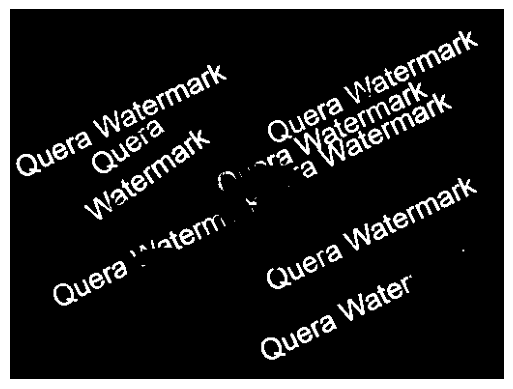

In [16]:
_, watermark_mask = cv2.threshold(gray_diff, 10, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.imshow(watermark_mask,cmap='gray')
plt.axis('off')
plt.show()

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
ساخت تصویر 3 کاناله
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
تصویر باینری که در مرحله قبل بدست آوردیم یک تصویر تک کاناله است. در سلول زیر این تصویر را به یک تصویر سه کاناله یا رنگی تبدیل کنید. یعنی هر سه کانال R, G و B  باید <code>watermark_mask</code> باشند.
</font>
</p>

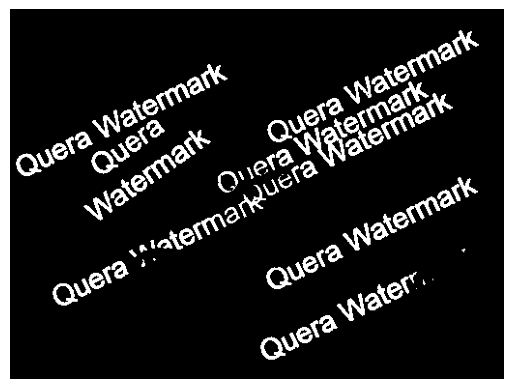

In [10]:
watermark_mask_3ch = cv2.merge([watermark_mask, watermark_mask, watermark_mask])

plt.imshow(cv2.cvtColor(watermark_mask_3ch,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
مشاهده میشود که تصویر واترمارک اولیه رنگی را به یک تصویر واترمارک سه کاناله تبدیل کردیم که خود واترمارک ها، سفید خالص اند. چرا در مرحله قبل به تصویر سه کاناله تبدیل کردیم؟ برای انجام عملیات منطقی که در سلول های بعد انجام خواهیم داد.
</font>
</p>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ماسک بدست آمده در تصویر قبل را معکوس کنید. یعنی تمام تصویر سفید بجز خود واترمارک که سیاه میشوند.
</font>
</p>

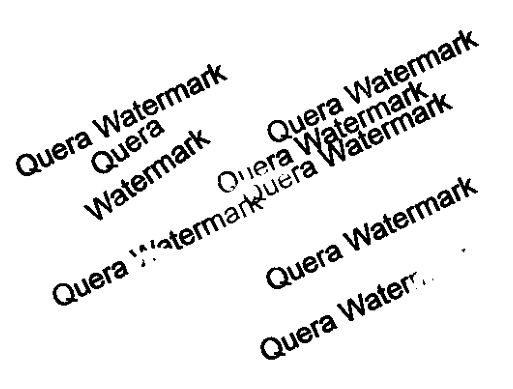

In [11]:
watermark_mask_inv = 255 - watermark_mask_3ch

plt.imshow(cv2.cvtColor(watermark_mask_inv,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
بین دو تصویر واترمارک اولیه و ماسک معکوس که از مرحله قبل بدست آمد عملیات And انجام دهید و حاصل را در متغیر <code>result</code> نگه داری کنید. عمل and چه عملیاتی روی دو تصویر انجام داده است و حاصل نشان دهنده چیست؟
</font>
</p>

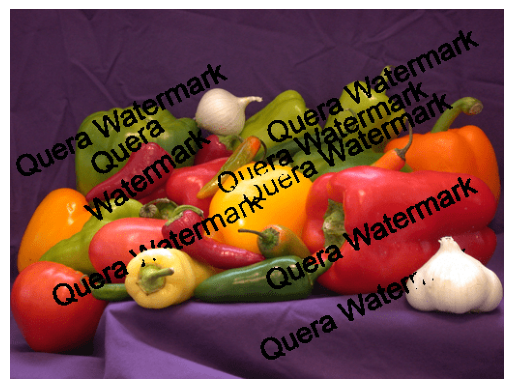

In [12]:
# And operation between watermarked and watermark_mask_inv
result = cv2.bitwise_and(watermarked, watermark_mask_inv)

plt.imshow(cv2.cvtColor(result,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

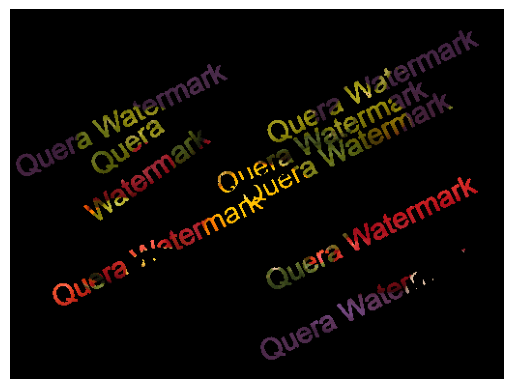

In [13]:
# And operation between original and watermark_mask_3ch
original_part = cv2.bitwise_and(original, watermark_mask_3ch)

plt.imshow(cv2.cvtColor(original_part,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حال دو تصویر بدست آمده از دو سلول قبل یعنی متغیر های <code>result</code> و <code>original_part</code> را با هم جمع کنید. و حاصل را نمایش دهید.
</font>
</p>

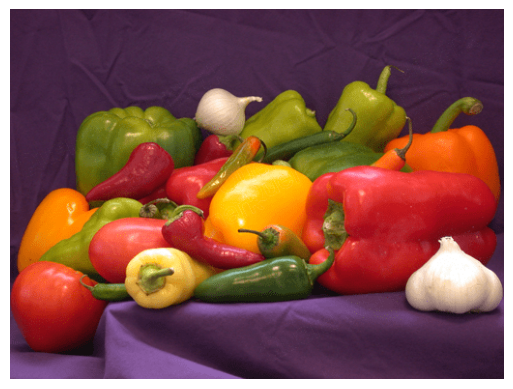

In [14]:
final_image = cv2.add(result, original_part)

plt.imshow(cv2.cvtColor(final_image,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با کمی چشم پوشی میتوان گفت که ما به تصویر اصلی خودمان رسیده ایم. علت اینکه هنوز ردپایی از واترمارک روی تصویر باقی مانده است، رنگ قسمت هایی از تصویر است که باعث شده قسمت واترمارک به خوبی شناسایی نشود. البته در مراحل قبل تر میتوانستیم با عملیاتی مثل مورفولوژی یا inpating قسمت واترمارک را تقویت کنیم تا تصویر نهایی تمیز تری داشته باشیم اما هدف از این تمرین صرفا کار عملی با عملیات پایه ای است که در این فصل فرا گرفتیم.
نکته: برای گرفتن نتیجه بهتر، بهتر است تمامی عملیات پایه مثل جمع، تفریق و... را با استفاده از کتابخانه opencv انجام دهید.
</font>
</p>

<div dir="rtl">
<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>
</div>
<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) تا در صورت نیاز به پشتیبانی امکان بررسی کد شما وجود داشته باشد.
</font>
</p>

In [15]:
import zipfile
import joblib

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)
            

cv2.imwrite('final_image.png', final_image)
file_names = [ 'final_image.png', 'NoteBook.ipynb']
compress(file_names)

File Paths:
['final_image.png', 'NoteBook.ipynb']
